In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from category_encoders import CountEncoder
from datetime import datetime
from geopy.distance import geodesic
import pickle

In [2]:
os.chdir("../")

In [5]:
data_path="data/raw/fraudTest.csv"

In [6]:
df = pd.read_csv(data_path)

In [5]:
df.size

42605062

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [12]:
len(list(df['merchant'].unique()))

693

In [13]:
with open("artifacts/maps/merchants_list.pkl", 'wb') as fp:
    pickle.dump(list(df['merchant'].unique()), fp)

In [14]:
with open("artifacts/maps/jobs_list.pkl", 'wb') as fp:
    pickle.dump(list(df['job'].unique()), fp)

In [15]:
with open("artifacts/maps/states_list.pkl", 'wb') as fp:
    pickle.dump(list(df['state'].unique()), fp)

In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### Unique Values

In [9]:
df.cc_num.nunique()

999

In [10]:
df.trans_num.nunique()

1852394

In [11]:
df.street.nunique()

999

In [12]:
df['first'].nunique()

355

In [13]:
df['city'].value_counts()

city
Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Streator          7
Bruce             7
Norfolk           7
Chattanooga       7
Wever             6
Name: count, Length: 906, dtype: int64

In [14]:
df.drop(columns=['cc_num', 'trans_num', 'street', 'first', 'last', 'city'], inplace=True)

In [15]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
df['trans_date_trans_time'].value_counts()

trans_date_trans_time
2019-04-22 16:02:01    4
2020-12-19 16:02:22    4
2020-06-02 12:47:07    4
2020-12-13 17:53:47    4
2020-10-05 19:37:49    4
                      ..
2019-02-10 14:53:23    1
2019-02-10 14:53:08    1
2019-02-10 14:52:20    1
2019-02-10 14:51:21    1
2020-06-21 12:13:37    1
Name: count, Length: 1819551, dtype: int64

In [17]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
gender                    object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [18]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [19]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

In [20]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,zip,lat,long,city_pop,...,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,dayofweek
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,33.9659,-80.9355,333497,...,1968-03-19,1371816865,33.986391,-81.200714,0,2020,6,21,12,6
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,40.3207,-110.4360,302,...,1990-01-17,1371816873,39.450498,-109.960431,0,2020,6,21,12,6
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,40.6729,-73.5365,34496,...,1970-10-21,1371816893,40.495810,-74.196111,0,2020,6,21,12,6
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,FL,32780,28.5697,-80.8191,54767,...,1987-07-25,1371816915,28.812398,-80.883061,0,2020,6,21,12,6
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,MI,49632,44.2529,-85.0170,1126,...,1955-07-06,1371816917,44.959148,-85.884734,0,2020,6,21,12,6


In [21]:
df.drop(columns=['trans_date_trans_time'], inplace=True)

In [22]:
df['is_fraud']=df["is_fraud"].astype('int') 

In [23]:
sub_fraud_df = df[df['is_fraud'] == 1]

In [24]:
sub_fraud_df['is_fraud'].value_counts()

is_fraud
1    9651
Name: count, dtype: int64

In [25]:
sub_fraud_df.groupby('dayofweek')['is_fraud'].sum()

dayofweek
0    1484
1    1266
2    1125
3    1317
4    1376
5    1493
6    1590
Name: is_fraud, dtype: int64

In [26]:
fraud_counts = sub_fraud_df.groupby('dayofweek')['is_fraud'].sum()

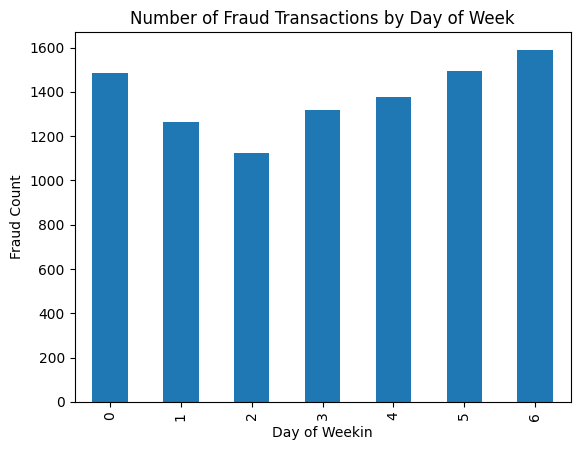

In [27]:
plt.figure()
fraud_counts.plot(kind='bar')
plt.xlabel("Day of Weekin")
plt.ylabel("Fraud Count")
plt.title("Number of Fraud Transactions by Day of Week")
plt.show()

In [28]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [29]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64

In [30]:
encoder = TargetEncoder()

In [31]:
df['merchant_encoded'] = encoder.fit_transform(df['merchant'], df['is_fraud'])
df[['merchant', 'merchant_encoded']].head(10)

,merchant,merchant_encoded
0,fraud_Kirlin and Sons,0.001959
1,fraud_Sporer-Keebler,0.002299
2,"fraud_Swaniawski, Nitzsche and Welch",0.001214
3,fraud_Haley Group,0.004274
4,fraud_Johnston-Casper,0.001665
5,fraud_Daugherty LLC,0.002499
6,fraud_Romaguera Ltd,0.001233
7,fraud_Reichel LLC,0.002734
8,"fraud_Goyette, Howell and Collier",0.006707
9,fraud_Kilback Group,0.001908


In [32]:
count_encoder = CountEncoder()
df['category_encoded'] = count_encoder.fit_transform(df['category'])
df[['category', 'category_encoded']].head(10)

,category,category_encoded
0,personal_care,130085
1,personal_care,130085
2,health_fitness,122553
3,misc_pos,114229
4,travel,57956
5,kids_pets,161727
6,health_fitness,122553
7,personal_care,130085
8,shopping_pos,166463
9,food_dining,130729


In [33]:
df['gender_encoded'] = df['gender'].map({'M': 0, 'F': 1}) 

In [34]:
df['job_encoded'] = count_encoder.fit_transform(df['job'])
df[['job', 'job_encoded']].head(10)

,job,job_encoded
0,Mechanical engineer,8062
1,"Sales professional, IT",8052
2,"Librarian, public",8773
3,Set designer,2208
4,Furniture designer,2934
5,Psychotherapist,2921
6,"Therapist, occupational",6594
7,"Development worker, international aid",4403
8,Advice worker,3647
9,Barrister,8767


In [35]:
df['state_encoded'] = encoder.fit_transform(df['state'], df['is_fraud'])
df[['state', 'state_encoded']].head(10)

,state,state_encoded
0,SC,0.005655
1,UT,0.003972
2,NY,0.006113
3,FL,0.005496
4,MI,0.004542
5,NY,0.006113
6,CA,0.004994
7,SD,0.005235
8,PA,0.005010
9,TX,0.004376


In [36]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'dayofweek',
       'merchant_encoded', 'category_encoded', 'gender_encoded', 'job_encoded',
       'state_encoded'],
      dtype='object')

In [40]:
current_year = datetime.now().year
df['age'] = current_year - df['dob'].str[:4].astype(int)

In [47]:
bins = [20, 35, 50, 65, 75, 102]  # upper bound large enough
labels = ['20-35', '36-50', '51-65', '66-75', '75+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [48]:
fraud_age_counts = df.groupby('age_group')['is_fraud'].sum()

/var/folders/mc/mdxqrfx544b41_my4p_xd2cc0000gn/T/ipykernel_9453/1993651945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_age_counts = df.groupby('age_group')['is_fraud'].sum()


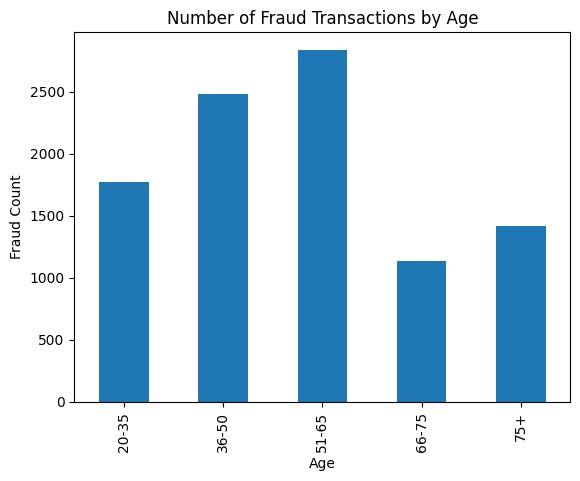

In [49]:
plt.figure()
fraud_age_counts.plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Fraud Count")
plt.title("Number of Fraud Transactions by Age")
plt.show()

In [50]:
df['lat'].value_counts()

lat
36.3850    5116
43.0048    5116
42.5164    5115
26.1184    5108
40.6761    4392
           ... 
38.3847       7
41.1165       7
35.0271       7
41.0022       7
40.7067       6
Name: count, Length: 983, dtype: int64

In [52]:
df['distance_km'] = df.apply(
    lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km,
    axis=1
)

In [54]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'dayofweek',
       'merchant_encoded', 'category_encoded', 'gender_encoded', 'job_encoded',
       'state_encoded', 'age', 'age_group', 'distance_km'],
      dtype='object')

In [55]:
df.drop(columns=['age_group', 'dob','merch_lat', 'merch_long', 'lat', 'long'],inplace=True )

In [ ]:
df.to_csv("data/processed/data_processed_v0.csv", index=False)

In [61]:
with open("artifacts/encoders/target_encoder.pkl", 'wb') as file:
    pickle.dump(encoder, file)

In [62]:
with open("artifacts/encoders/count_encoder.pkl", 'wb') as file:
    pickle.dump(count_encoder, file)